In [43]:
import json
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

from os.path import join
from tqdm import tqdm

import statsmodels.api as stats_api
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor



from datetime import datetime
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
savePlots = False

import warnings
warnings.filterwarnings('ignore')

In [44]:
hashtags = {
    'gohawks' : 188136,
    'nfl' : 259024,
    'sb49' : 826951,
    'gopatriots' : 26232,
    'patriots' : 489713,
    'superbowl' : 1348767
}

### The Following features will be used for cross validation : 


In [45]:
feature_names = ['Number of Tweets', 'Number of Retweets', 'Number of Followers', 'Max Number of Followers',
                  'Impression Count', 'Favourite Count', 'Ranking Score', 'Hour of Day', 'Number of Users tweeting',
                  'Number of Long Tweets']


In [46]:


def cross_validate(X, Y):
    
    svrModel = SVR(C=1.0, epsilon=0.2)
    randomForestRegressor = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=10, bootstrap=True)
    
    errors_linear = []
    errors_svr = []
    errors_randomForestRegressor = []
    
    for train_index, test_index in KFold(n_splits=10).split(X):
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        

        lineal_model = stats_api.OLS(Y_train, X_train).fit()
        Y_pred_lm = lineal_model.predict(X_test)
        errors_linear.append(mean_absolute_error(Y_test, Y_pred_lm))
        
        svrModel.fit(X_train, Y_train)
        Y_pred_svr = svrModel.predict(X_test)
        errors_svr.append(mean_absolute_error(Y_test, Y_pred_svr))
        
        randomForestRegressor.fit(X_train, Y_train)
        Y_pred_rf = randomForestRegressor.predict(X_test)
        errors_randomForestRegressor.append(mean_absolute_error(Y_test, Y_pred_rf))
        
        

    return errors_linear, errors_svr, errors_randomForestRegressor



In [47]:
def df2array(df):
    df = df.set_index('dateTime')
    hourlySeries = df.groupby(pd.TimeGrouper(freq='60Min'))

    X = np.zeros((len(hourlySeries), 10))
    Y = np.zeros((len(hourlySeries), 1))

    # Extract features for each hourly interval
    for i,(interval,group) in enumerate(hourlySeries):
        X[i, 0] = group.tweetCount.sum()        # Number of tweets
        X[i, 1] = group.retweetCount.sum()      # Number of retweets
        X[i, 2] = group.followerSum.sum()       # Sum of follower counts
        X[i, 3] = group.maxFollowers.max()      # Maximum size following
        X[i, 4] = interval.hour                 # Hour of the day
        X[i, 5] = group.impressionCount.sum()   # Sum of impression count
        X[i, 6] = group.favoriteCount.sum()     # Sum of favorites
        X[i, 7] = group.rankingScore.sum()      # Sum of rankings
        X[i, 8] = group.userID.nunique()        # Number of unique users tweeting
        X[i, 9] = len(group.longTweet)          # Number of long tweets

        Y[i, 0] = group.tweetCount.sum()


    # Shift X and Y forward by one to reflect next hours predictions
    X = np.nan_to_num(X[:-1])
    Y = Y[1:]

    return X, Y


### Part 1.4: Question i) Models for Individual hashtags

----------------------------------------
Extracting features from tweets:  
#superbowl:



100%|██████████| 1348767/1348767 [05:33<00:00, 4039.84it/s]


####################
All time periods 

Errors: 

('Linear Regression Model:  \r', [14.034457794873312, 13.656351255740937, 13.981964892156736, 25.04043602694166, 160.7863146814626, 1214.5547168771427, 631.7058688112703, 1661.6946343738994, 6909.581133566576, 896.9103786608417])
('SV Regression Model:  \r', [30.17122927950682, 30.17801359296831, 29.802682846143284, 38.770864134983285, 44.69761066761393, 572.9078025311488, 143.06915729153778, 627.0876001096383, 12122.639396943965, 281.5713270660646])
('Random Forest Regression Model:  \r', [57.59083881759101, 57.57882234810529, 57.58970033085544, 62.75325276126612, 29.035041374056462, 549.8184854705456, 62.37004177493628, 409.0242186229934, 11101.776621311488, 146.96008896195443])


Mean absolute error was : 

('Linear Regression Model:  \r', 1154.1946256940905)
('SV Regression Model:  \r', 1392.0895684463571)
('Random Forest Regression Model:  \r', 1253.4497111773792)


RMSE was : 

('Linear Regression Model:  \r', 33.97344000383374)
(

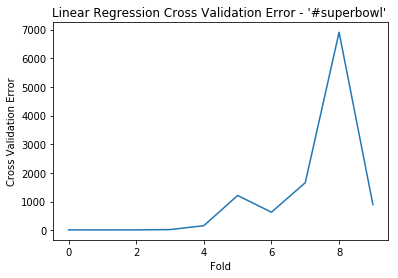

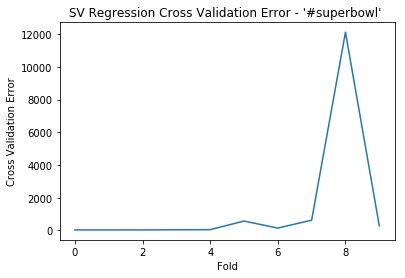

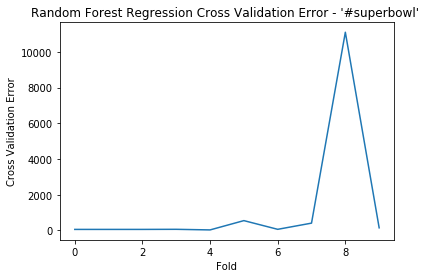

####################
First time period 

Errors: 

('Linear Regression Model:  \r', [43.437930932354575, 45.30483180147481, 41.291265748923564, 46.94549226465619, 35.570437367464145, 335.697057208554, 335.2283754910366, 76.9733878648431, 197.77537469612673, 620.2048346980063])
('SV Regression Model:  \r', [3.22431231365117, 3.9516866868150484, 2.6587881952537016, 5.173034930875172, 21.645353642147494, 390.50242414164524, 310.2611532780782, 145.29327798047464, 395.66942064245103, 1215.2243394486563])
('Random Forest Regression Model:  \r', [4.960696968580708, 4.947338711570563, 4.961461843658864, 4.901415852919294, 6.811171943072637, 321.7026872211691, 373.5708073560835, 61.16296236327361, 244.2564806806519, 545.5453825285006])


Mean absolute error was : 

('Linear Regression Model:  \r', 177.842898807344)
('SV Regression Model:  \r', 249.36037912600483)
('Random Forest Regression Model:  \r', 157.28204054694808)


RMSE was : 

('Linear Regression Model:  \r', 13.335775148349795)
('SV 

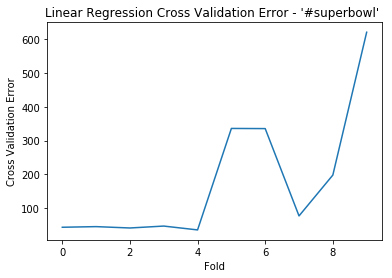

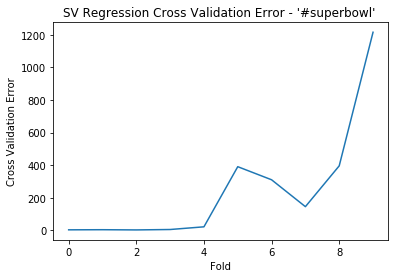

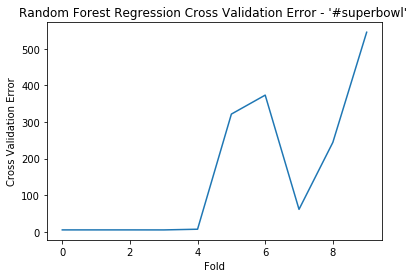

####################
Second time period 

Errors: 

('Linear Regression Model:  \r', [133856.28685292776, 26457.013786179014, 19264.26733648777, 19771.239406756125, 41923.625027769245, 126463.50088912388, 95529.35165786743, 329559.940802142, 23176.27154327929, 149657.90729097277])
('SV Regression Model:  \r', [122210.0, 68304.0, 65896.0, 64463.0, 46691.0, 169865.0, 189143.0, 251653.0, 111154.0, 111718.0])
('Random Forest Regression Model:  \r', [83613.1, 5033.9, 1445.9500000000007, 4890.5999999999985, 12277.9, 171336.4, 34466.600000000006, 78051.4, 51778.5, 70057.20000000001])


Mean absolute error was : 

('Linear Regression Model:  \r', 96565.94045935053)
('SV Regression Model:  \r', 120109.7)
('Random Forest Regression Model:  \r', 51295.155)


RMSE was : 

('Linear Regression Model:  \r', 310.7506081399529)
('SV Regression Model:  \r', 346.5684636547301)
('Random Forest Regression Model:  \r', 226.4843372067923)




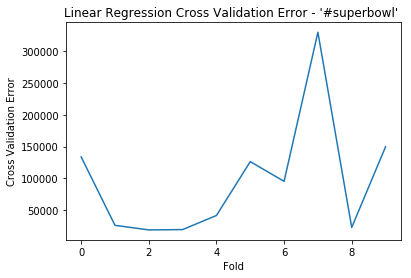

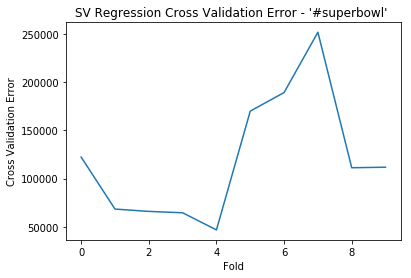

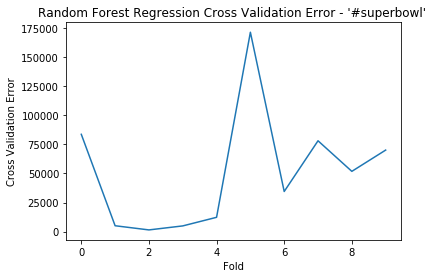

####################
Third time period 

Errors: 

('Linear Regression Model:  \r', [1129.1022103020555, 553.8369075251081, 353.1069216926744, 210.17221449682754, 108.73971941354846, 67.32376846591879, 77.32466702414324, 158.47844564019584, 106.19565185933514, 23.011612890929122])
('SV Regression Model:  \r', [1263.576190476191, 2316.433333333334, 780.7904761904764, 182.71428571428572, 176.84615384615384, 208.89230769230764, 132.76923076923077, 243.35384615384606, 143.16923076923075, 405.7384615384615])
('Random Forest Regression Model:  \r', [716.9770748299319, 1224.1089663312875, 206.03185156113724, 154.23016334207978, 98.62830378494458, 47.27403149518682, 49.45220594090709, 40.90338383224342, 85.87358511132462, 145.84073426573428])


Mean absolute error was : 

('Linear Regression Model:  \r', 278.72921193107356)
('SV Regression Model:  \r', 585.4283516483517)
('Random Forest Regression Model:  \r', 276.9320300494777)


RMSE was : 

('Linear Regression Model:  \r', 16.69518529190597

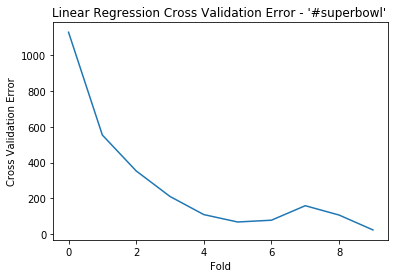

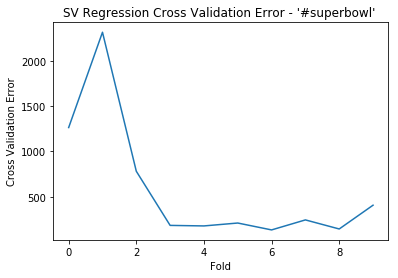

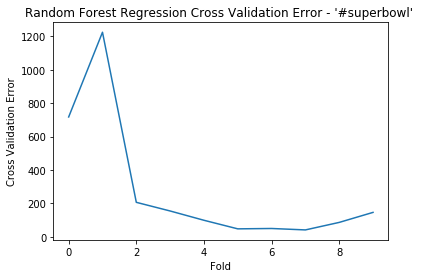

  0%|          | 0/259024 [00:00<?, ?it/s]

----------------------------------------
Extracting features from tweets:  
#nfl:



100%|██████████| 259024/259024 [00:48<00:00, 5301.35it/s]


####################
All time periods 

Errors: 

('Linear Regression Model:  \r', [3.821450403040834, 5.439617908820944, 7.576785456549673, 28.191163087007833, 205.33051726556963, 107.745837820595, 84.29152171743655, 210.12228446104464, 422.1242583028357, 150.04188884182673])
('SV Regression Model:  \r', [112.07973025148131, 112.09798952002748, 114.64775446622262, 92.08416819655973, 276.9741935483871, 105.89103942652334, 136.30426828161603, 316.80217391304353, 983.9130434782609, 395.0177230728859])
('Random Forest Regression Model:  \r', [0.7665478167429902, 0.7583792720647524, 4.304831073027124, 19.77878526716388, 356.55420366400676, 118.21083882150793, 67.64179910343383, 120.54857712994024, 549.7745547552762, 95.73094214521068])


Mean absolute error was : 

('Linear Regression Model:  \r', 122.46853252647274)
('SV Regression Model:  \r', 264.5812084155008)
('Random Forest Regression Model:  \r', 133.40694590483741)


RMSE was : 

('Linear Regression Model:  \r', 11.066550163735434)

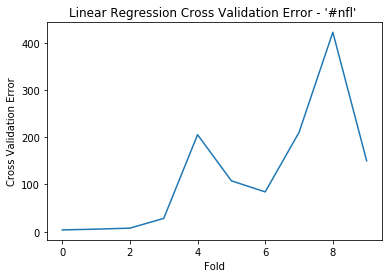

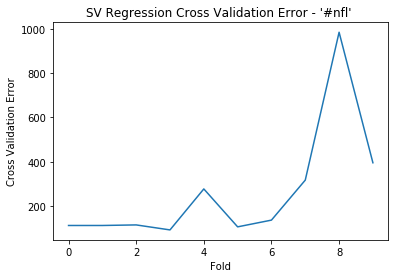

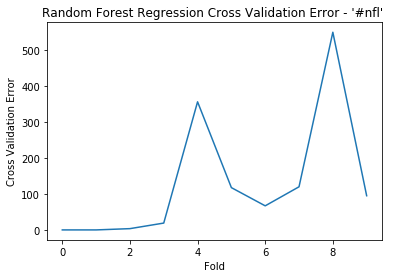

####################
First time period 

Errors: 

('Linear Regression Model:  \r', [20.87088935196538, 19.121973335121023, 20.0866976893746, 21.743184440973156, 45.68241514401356, 234.11638339628254, 70.83348702570365, 78.52583222367738, 68.41855197030877, 270.1043059484212])
('SV Regression Model:  \r', [61.81858509688281, 60.74330493054962, 62.60452193507019, 66.75069827422459, 65.17643049631462, 352.57994055902185, 129.2479789001672, 165.22015182084377, 168.67295441167443, 520.6730810744183])
('Random Forest Regression Model:  \r', [0.5367860894407885, 0.4749871956678771, 0.490838072514651, 5.026399365439133, 39.3676901384385, 164.79355424782338, 68.63219530482687, 77.28262766869251, 64.92662899586752, 281.53940189912464])


Mean absolute error was : 

('Linear Regression Model:  \r', 84.95037205258413)
('SV Regression Model:  \r', 165.34876474991674)
('Random Forest Regression Model:  \r', 70.30711089778359)


RMSE was : 

('Linear Regression Model:  \r', 9.216852610982999)
('SV R

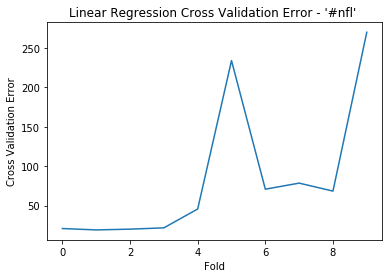

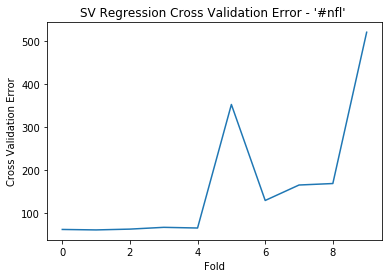

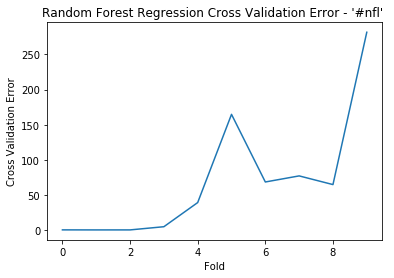

####################
Second time period 

Errors: 

('Linear Regression Model:  \r', [33636.3213772843, 4912.514304893826, 6148.330107014102, 126.00489581720467, 3818.3643318304094, 8417.042132869974, 11504.015901394043, 40320.047436628374, 17143.711326810648, 44244.9039829544])
('SV Regression Model:  \r', [5503.5, 3444.0, 3231.0, 3172.0, 2146.0, 7678.0, 6183.0, 6772.0, 4952.0, 9125.0])
('Random Forest Regression Model:  \r', [2290.8500000000004, 497.5666666666666, 64.45000000000005, 27.299999999999955, 861.9000000000001, 7934.7, 384.89999999999964, 172.39999999999964, 2231.3999999999996, 4654.0])


Mean absolute error was : 

('Linear Regression Model:  \r', 17027.12557974973)
('SV Regression Model:  \r', 5220.65)
('Random Forest Regression Model:  \r', 1911.9466666666667)


RMSE was : 

('Linear Regression Model:  \r', 130.48802849207942)
('SV Regression Model:  \r', 72.25406562955472)
('Random Forest Regression Model:  \r', 43.725812361426364)




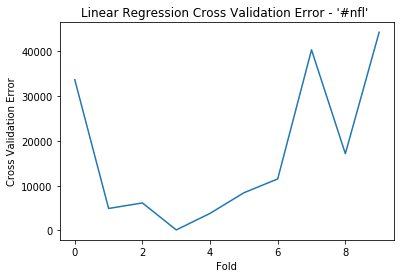

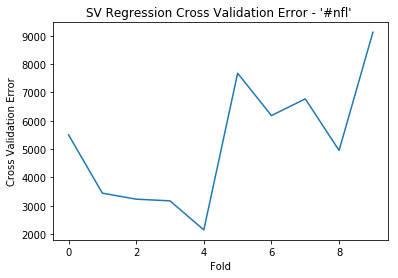

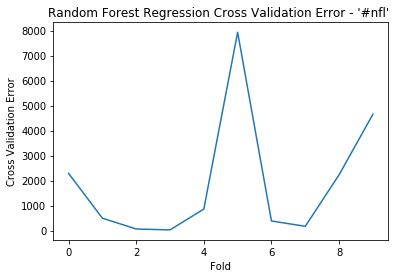

####################
Third time period 

Errors: 

('Linear Regression Model:  \r', [114.45389977675542, 202.36142562586832, 99.70910854176886, 139.06669736144534, 144.41220331560854, 53.150810394031154, 60.483867795966496, 103.83595577521093, 136.16829439176433, 43.6403079299338])
('SV Regression Model:  \r', [316.64285714285717, 507.09999999999997, 312.57142857142856, 224.85714285714286, 209.3230769230769, 192.15384615384616, 147.19999999999996, 207.6153846153846, 305.8538461538461, 524.1999999999999])
('Random Forest Regression Model:  \r', [179.12628970909577, 234.76829364940414, 64.63015560475199, 115.2921323898933, 124.7948543020018, 61.13333407846078, 80.3844643634067, 125.22333410734076, 122.6197293054078, 245.9362729347186])


Mean absolute error was : 

('Linear Regression Model:  \r', 109.72825709083531)
('SV Regression Model:  \r', 294.75175824175824)
('Random Forest Regression Model:  \r', 135.39088604444817)


RMSE was : 

('Linear Regression Model:  \r', 10.4751256360406

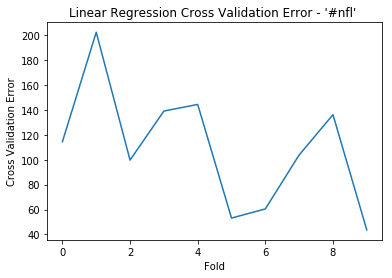

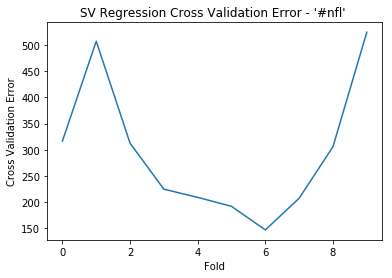

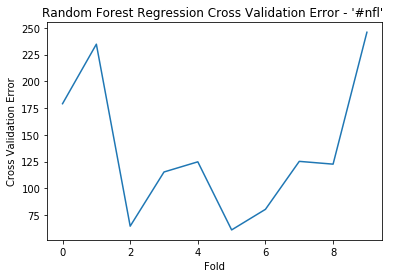

----------------------------------------


100%|██████████| 826951/826951 [02:23<00:00, 5766.05it/s]


Extracting features from tweets:  
#sb49:

####################
All time periods 

Errors: 

('Linear Regression Model:  \r', [38.56968499589082, 32.697922433808955, 38.127885102368445, 30.551808234839374, 49.48066612399999, 88.85486287381048, 1502.4301458666766, 4996.634642516096, 1184.8827770456817, 178.97925322977036])
('SV Regression Model:  \r', [40.4743129066161, 44.927573602937315, 30.156933741628222, 29.292884131219783, 25.028735632183906, 48.56206896551724, 329.4543439187141, 13356.8106029611, 261.0002581335129, 37.258620689655174])
('Random Forest Regression Model:  \r', [49.07934938904918, 50.79590542099459, 30.012195986034342, 28.396625316073656, 24.783067510552428, 33.858135302317194, 206.3837015344201, 12644.219141067717, 126.26222120942843, 25.604560810073405])


Mean absolute error was : 

('Linear Regression Model:  \r', 814.1209648422944)
('SV Regression Model:  \r', 1420.2966334683085)
('Random Forest Regression Model:  \r', 1321.9394903546658)


RMSE was : 

('Linea

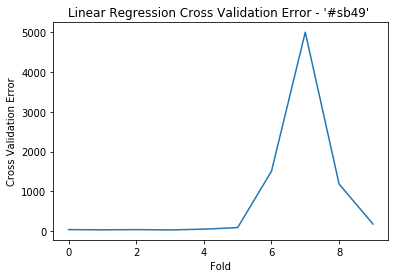

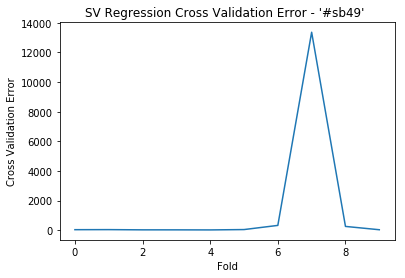

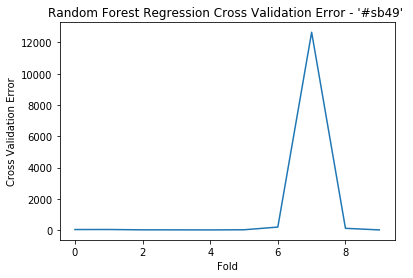

####################
First time period 

Errors: 

('Linear Regression Model:  \r', [34.64152059750248, 5.817379679227158, 28.404902481573615, 7.4964555208706365, 10.480995406666146, 10.248104428817548, 27.319425941408703, 27.459569011817706, 152.2779052079636, 176.89593769473217])
('SV Regression Model:  \r', [23.756005944786377, 21.46245613323272, 31.047883795499594, 12.41060847865471, 11.226983627516985, 10.912558139534887, 40.82997416020671, 57.14651162790696, 377.3572570025326, 449.0232558139535])
('Random Forest Regression Model:  \r', [12.357300190042901, 6.559338736832384, 27.05797488298142, 6.403980023681416, 8.964552871143724, 7.708413213473644, 20.452660059353224, 26.185050958895314, 118.39712582498109, 264.75469092821334])


Mean absolute error was : 

('Linear Regression Model:  \r', 48.10421959705798)
('SV Regression Model:  \r', 103.5173494723825)
('Random Forest Regression Model:  \r', 49.88410876895985)


RMSE was : 

('Linear Regression Model:  \r', 6.9357205535588)
(

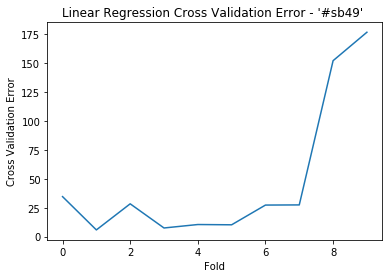

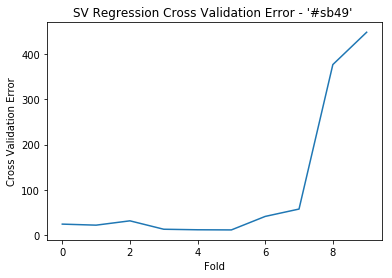

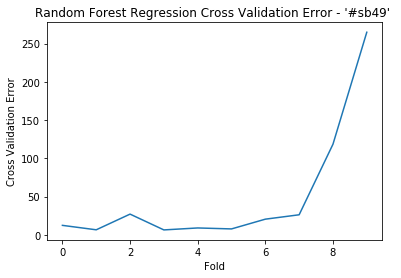

####################
Second time period 

Errors: 

('Linear Regression Model:  \r', [32043.50202326459, 182326.9521264271, 66136.47874124022, 79702.73213007394, 183150.42082018778, 31573.411214920226, 30033.1261001369, 278793.6302188728, 32879.035814431496, 61830.24492361583])
('SV Regression Model:  \r', [73546.5, 41363.5, 26248.5, 2246.0, 13695.5, 25673.5, 23677.5, 15941.5, 26911.5, 65914.5])
('Random Forest Regression Model:  \r', [65129.0, 74849.3, 18542.199999999997, 15147.699999999997, 10629.899999999994, 24518.800000000003, 20446.199999999997, 4106.699999999997, 1438.800000000003, 55051.100000000006])


Mean absolute error was : 

('Linear Regression Model:  \r', 97846.95341131708)
('SV Regression Model:  \r', 31521.85)
('Random Forest Regression Model:  \r', 28985.969999999994)


RMSE was : 

('Linear Regression Model:  \r', 312.80497664090495)
('SV Regression Model:  \r', 177.54393822375349)
('Random Forest Regression Model:  \r', 170.25266517737685)




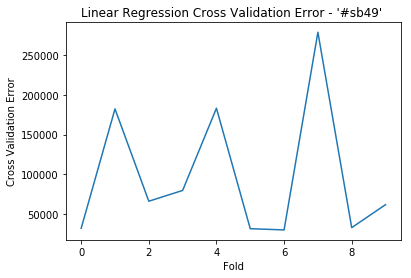

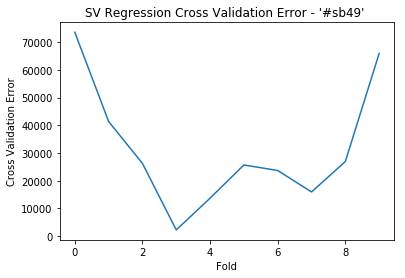

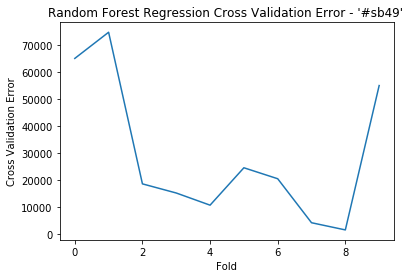

####################
Third time period 

Errors: 

('Linear Regression Model:  \r', [679.5051100787053, 249.76971853691492, 41.13752091636399, 62.960107834398066, 45.73061132073107, 19.63107294392076, 24.349066267938, 29.796290887986736, 25.18866862362153, 18.689498770099874])
('SV Regression Model:  \r', [1879.2095238095233, 858.4952380952382, 239.3523809523809, 84.5, 74.0, 58.44615384615386, 33.530769230769245, 69.23076923076923, 54.38461538461539, 95.76153846153845])
('Random Forest Regression Model:  \r', [588.6912698412698, 323.8008333446034, 99.89308459853397, 45.247052868566676, 52.06987420722808, 22.634137971672992, 21.908623105209657, 30.98897829053856, 17.20233301522853, 23.774358873615395])


Mean absolute error was : 

('Linear Regression Model:  \r', 119.675766618068)
('SV Regression Model:  \r', 344.6910989010988)
('Random Forest Regression Model:  \r', 122.62105461164671)


RMSE was : 

('Linear Regression Model:  \r', 10.939641978514105)
('SV Regression Model:  \r', 18.

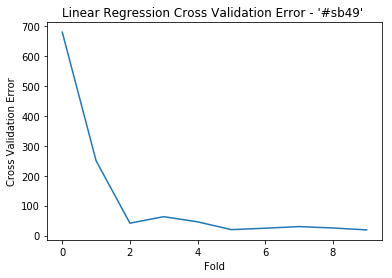

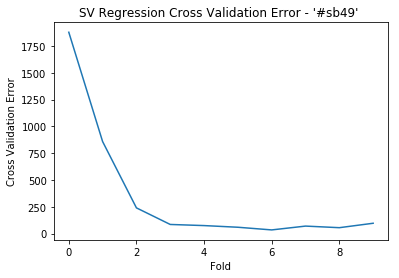

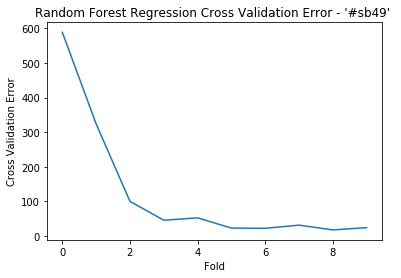

----------------------------------------
Extracting features from tweets:  
#patriots:



100%|██████████| 489713/489713 [01:27<00:00, 5599.33it/s]


####################
All time periods 

Errors: 

('Linear Regression Model:  \r', [109.45794910588651, 110.33096310073738, 108.65172219132563, 108.85752848311974, 183.96756135117647, 718.4636672721676, 420.8371539811638, 199.74985029318486, 4386.834370427649, 81.47764280229046])
('SV Regression Model:  \r', [15.212326842918172, 15.524043620065102, 16.471745851337285, 37.51006812261024, 65.8126004769875, 770.8216523551237, 262.20003425997777, 184.23075104767878, 3435.1763330501744, 34.67483489003054])
('Random Forest Regression Model:  \r', [25.19098092775046, 25.139770956525457, 25.103519665659924, 30.95609421642627, 40.87273168966157, 947.4007567132647, 153.43271766697538, 71.32483005109897, 2652.6856651706216, 24.30105173619166])


Mean absolute error was : 

('Linear Regression Model:  \r', 642.8628409008702)
('SV Regression Model:  \r', 483.7634390516904)
('Random Forest Regression Model:  \r', 399.6408118794176)


RMSE was : 

('Linear Regression Model:  \r', 25.354740008544166)


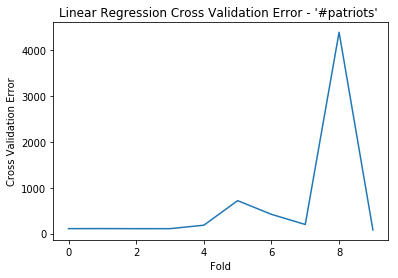

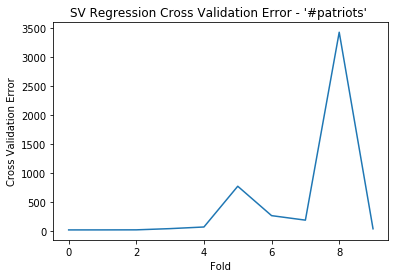

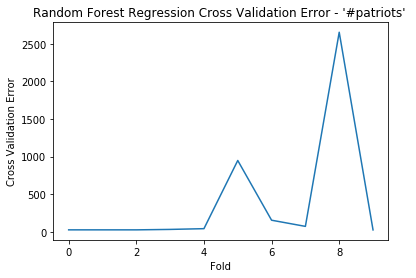

####################
First time period 

Errors: 

('Linear Regression Model:  \r', [55.36209464502922, 48.47254527498135, 54.9182100975412, 48.95845691637195, 56.72226992713695, 103.66413432374534, 482.6592199706967, 449.07362998758344, 193.33861293251638, 155.6852184963701])
('SV Regression Model:  \r', [8.758722518628641, 10.586999979672987, 9.186651018294794, 22.118809964626948, 39.6706527659593, 114.66272361546855, 864.4438161538261, 280.2882703635029, 243.103850569285, 91.31093293911596])
('Random Forest Regression Model:  \r', [2.074808552426666, 2.0195553391956613, 2.0322813740358194, 10.184580233420723, 12.192340549635881, 55.7702384325284, 592.0568664301004, 200.3461886751828, 85.51233760996125, 58.157511053847074])


Mean absolute error was : 

('Linear Regression Model:  \r', 164.88543925719728)
('SV Regression Model:  \r', 168.4131429888381)
('Random Forest Regression Model:  \r', 102.03467082503347)


RMSE was : 

('Linear Regression Model:  \r', 12.840772533504255)
('SV 

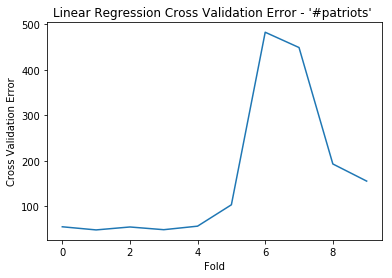

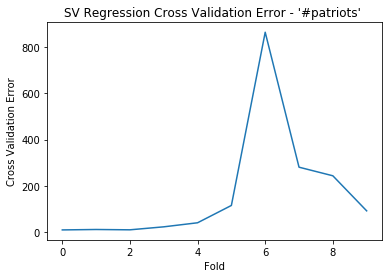

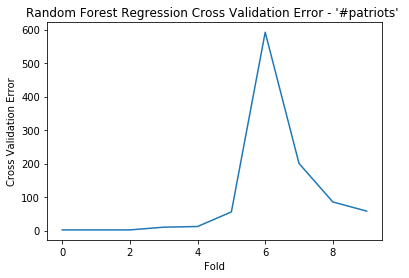

####################
Second time period 

Errors: 

('Linear Regression Model:  \r', [81373.40838913938, 28150.082749293797, 28179.867560865358, 4058.344063889701, 222504.79421008006, 45094.35532777617, 153044.93079598434, 365.7362543293275, 16032.982494646858, 13316.414686052594])
('SV Regression Model:  \r', [27970.5, 21555.5, 14324.5, 3495.5, 2380.0, 7316.5, 1115.5, 20487.0, 15227.0, 7103.5])
('Random Forest Regression Model:  \r', [33877.7, 24869.7, 26841.7, 5704.4000000000015, 7271.199999999997, 3612.699999999997, 16202.7, 19141.15, 3709.4000000000015, 10878.599999999999])


Mean absolute error was : 

('Linear Regression Model:  \r', 59212.09165320576)
('SV Regression Model:  \r', 12097.55)
('Random Forest Regression Model:  \r', 15210.925)


RMSE was : 

('Linear Regression Model:  \r', 243.33534813751527)
('SV Regression Model:  \r', 109.98886307258567)
('Random Forest Regression Model:  \r', 123.33257882652093)




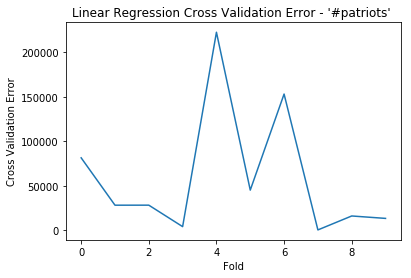

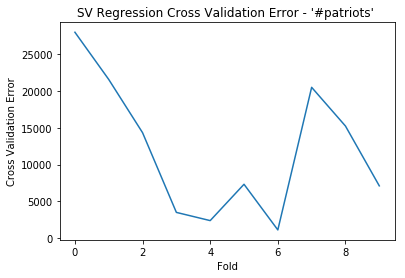

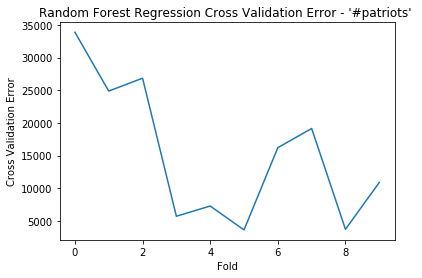

####################
Third time period 

Errors: 

('Linear Regression Model:  \r', [519.6347603546545, 112.97286313421897, 94.44509846361605, 20.22870679888567, 38.304703542702306, 13.898545101052665, 18.95374843416475, 19.215267788799405, 23.157453508678813, 11.775627470140503])
('SV Regression Model:  \r', [936.057142857143, 179.38571428571422, 73.60714285714286, 24.714285714285715, 43.886153846153846, 34.17307692307692, 19.096153846153847, 34.94230769230769, 14.723076923076926, 62.86538461538461])
('Random Forest Regression Model:  \r', [594.3809523809524, 160.0811068134348, 72.57684014175295, 14.795027527650092, 90.9998522300203, 15.96129589937293, 16.849995221769436, 12.445417994421472, 24.432054790733183, 25.065675631929473])


Mean absolute error was : 

('Linear Regression Model:  \r', 87.25867745969137)
('SV Regression Model:  \r', 142.34504395604398)
('Random Forest Regression Model:  \r', 102.7588218632037)


RMSE was : 

('Linear Regression Model:  \r', 9.341235328354134)


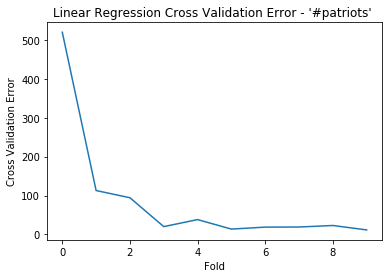

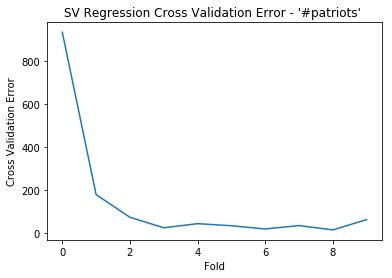

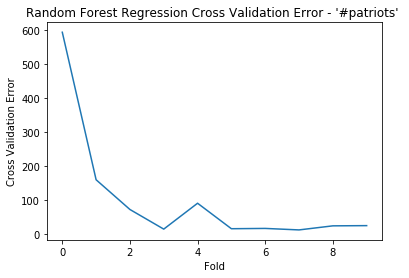

  0%|          | 427/188136 [00:00<00:44, 4261.39it/s]

----------------------------------------
Extracting features from tweets:  
#gohawks:



100%|██████████| 188136/188136 [00:33<00:00, 5634.96it/s]


####################
All time periods 

Errors: 

('Linear Regression Model:  \r', [52.4099347784524, 52.36299587949902, 51.21926073174282, 55.72205506506115, 170.2780708838066, 678.1189368194655, 150.40108008920902, 138.5087349899492, 718.4117469047034, 49.22448311408448])
('SV Regression Model:  \r', [4.206560419168347, 4.98925037319823, 8.073998926518902, 13.539985636737173, 138.81243873194182, 720.3802582049165, 122.19471746510007, 130.17593998972097, 739.7617258736798, 26.164176248725152])
('Random Forest Regression Model:  \r', [9.029371316132153, 8.981196896211689, 10.306067186072283, 8.707996061234281, 59.386267747200016, 456.5616598770189, 69.29358224803705, 62.124146413751625, 323.4202735419199, 4.818291405207843])


Mean absolute error was : 

('Linear Regression Model:  \r', 211.6657299255973)
('SV Regression Model:  \r', 190.82990518697068)
('Random Forest Regression Model:  \r', 101.26288526927857)


RMSE was : 

('Linear Regression Model:  \r', 14.548736368688427)
('SV R

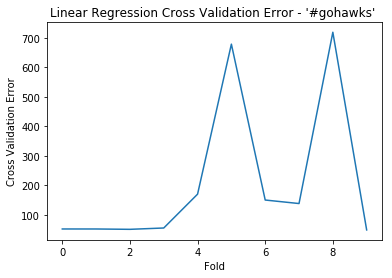

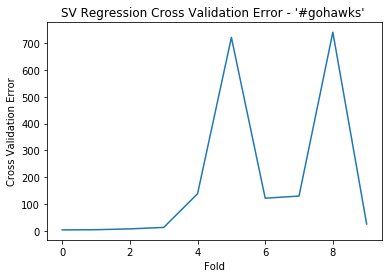

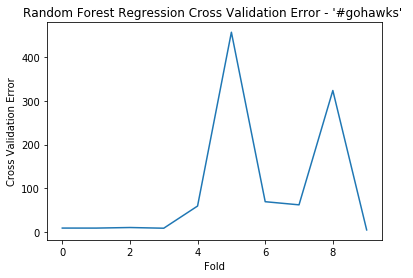

####################
First time period 

Errors: 

('Linear Regression Model:  \r', [77.61986027156934, 68.724845029193, 78.9121051265908, 75.08456444336105, 92.41901621803915, 340.16882062075524, 565.1487125935762, 273.06205669331433, 293.89450948883064, 118.97610490847141])
('SV Regression Model:  \r', [5.714694950318609, 6.80010423808697, 5.498675014872842, 14.978804664614916, 30.648310109947925, 267.4019662543152, 706.3537628529429, 94.80114419637096, 184.88306968395926, 44.658232249993176])
('Random Forest Regression Model:  \r', [8.325154654033552, 8.269831927024347, 8.267724220897566, 6.414769617397914, 11.442025087575551, 113.0053378084343, 437.7257213804236, 60.13911810882422, 64.56730441148143, 29.061718670463264])


Mean absolute error was : 

('Linear Regression Model:  \r', 198.40105953937012)
('SV Regression Model:  \r', 136.17387642154227)
('Random Forest Regression Model:  \r', 74.72187058865559)


RMSE was : 

('Linear Regression Model:  \r', 14.085491100397249)
('SV R

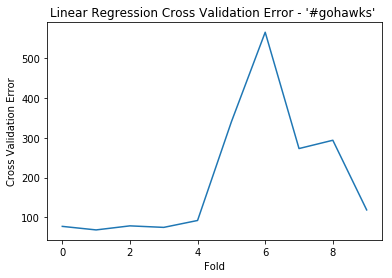

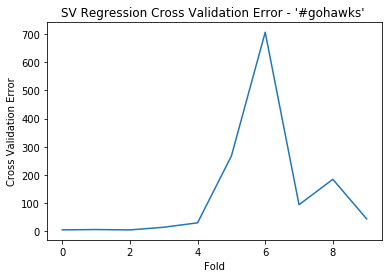

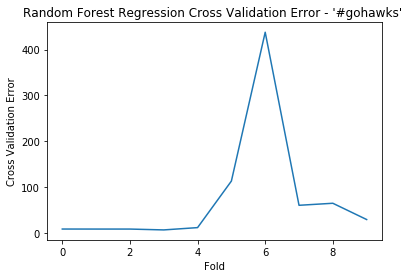

####################
Second time period 

Errors: 

('Linear Regression Model:  \r', [367421.1394293399, 3902.568158122587, 1315.6558985381416, 7457.130493588178, 422.0705466348445, 3859.4616804984544, 39363.2783179229, 6134.5159868043265, 4649.688670456235, 5016.994168234756])
('SV Regression Model:  \r', [3642.5, 1526.0, 891.0, 662.0, 1513.0, 8629.0, 4962.0, 6456.0, 4313.0, 851.0])
('Random Forest Regression Model:  \r', [4336.4, 2431.5666666666666, 356.0, 735.3000000000002, 122.69999999999982, 7901.4, 82.79999999999927, 5483.9, 570.3999999999996, 5664.0])


Mean absolute error was : 

('Linear Regression Model:  \r', 43954.25033501403)
('SV Regression Model:  \r', 3344.55)
('Random Forest Regression Model:  \r', 2768.4466666666667)


RMSE was : 

('Linear Regression Model:  \r', 209.6526897872146)
('SV Regression Model:  \r', 57.83208452061883)
('Random Forest Regression Model:  \r', 52.61603051035556)




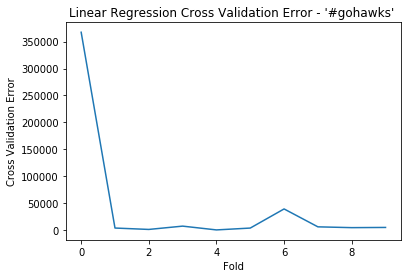

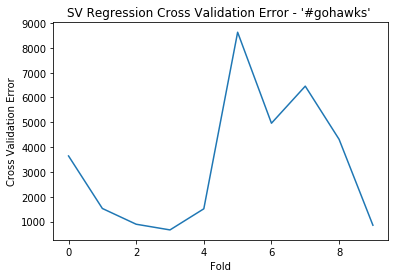

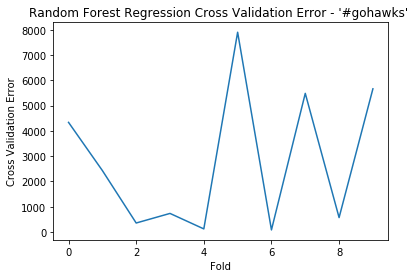

####################
Third time period 

Errors: 

('Linear Regression Model:  \r', [45162.17613562062, 421.82717253055245, 12.511768287641075, 5.488297277808958, 5.436180775191128, 5.449117089153777, 4.866866507350882, 4.050871886142055, 7.613107866277222, 3.242762002223896])
('SV Regression Model:  \r', [276.5947385512573, 49.979353935872616, 3.635922097546854, 3.8008388644421824, 1.1697383234481007, 2.751616483251537, 2.3544003102914317, 2.202081840005917, 2.1614485996839266, 2.563497582725745])
('Random Forest Regression Model:  \r', [158.10000000000002, 52.73358957101731, 4.632255049359903, 3.6757532823403403, 1.4340519905448497, 3.1675279922802835, 1.7523232785843168, 1.464014376513682, 1.5915074371666271, 2.292347852465718])


Mean absolute error was : 

('Linear Regression Model:  \r', 4563.266227984296)
('SV Regression Model:  \r', 34.72136365885256)
('Random Forest Regression Model:  \r', 23.084337083027307)


RMSE was : 

('Linear Regression Model:  \r', 67.5519520664229)
('

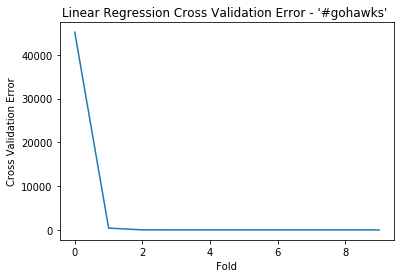

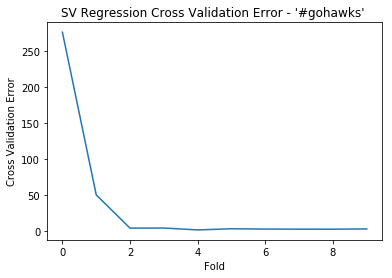

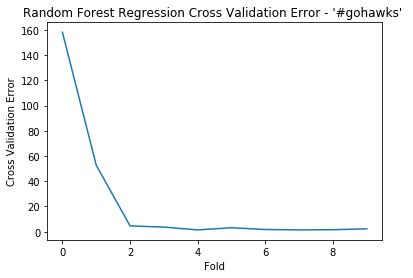

  2%|▏         | 437/26232 [00:00<00:05, 4365.15it/s]

----------------------------------------
Extracting features from tweets:  
#gopatriots:



100%|██████████| 26232/26232 [00:04<00:00, 5816.14it/s]


####################
All time periods 

Errors: 

('Linear Regression Model:  \r', [6.045571470950554, 6.492408628269529, 12.396162526978891, 144.52024238979547, 23.67804644466005, 20.346318765268308, 15.058015897486023, 15.740993700192094, 227.0463334723364, 5.5276277988828735])
('SV Regression Model:  \r', [0.5710393490277489, 1.9617654298175504, 2.6116876046867588, 60.73437994940047, 3.7553647477605017, 4.78109668209248, 6.494524971864673, 4.691449608766788, 286.81899994192776, 0.9671310672919025])
('Random Forest Regression Model:  \r', [3.022760042530242, 2.2268057027305437, 2.2760175462399452, 68.09702254801078, 6.046021447637112, 5.063220615068057, 5.674930753532109, 3.6751355418685385, 222.3836420179848, 2.546874262393876])


Mean absolute error was : 

('Linear Regression Model:  \r', 47.685172109482025)
('SV Regression Model:  \r', 37.338743935263665)
('Random Forest Regression Model:  \r', 32.1012430477996)


RMSE was : 

('Linear Regression Model:  \r', 6.905445105819177)
(

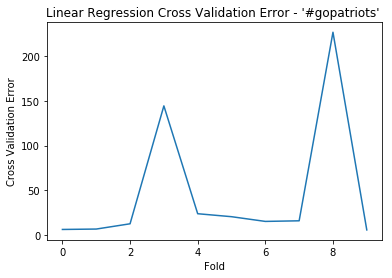

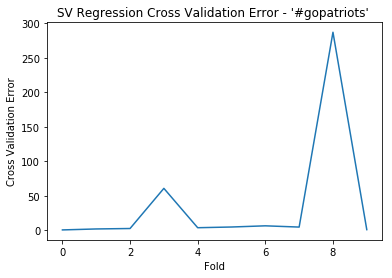

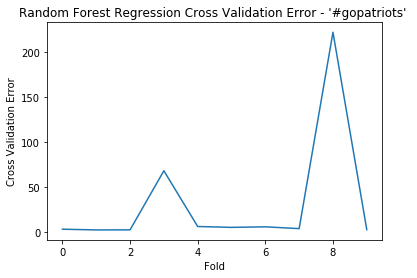

####################
First time period 

Errors: 

('Linear Regression Model:  \r', [4.963383410200519, 5.108279339372439, 4.83926965009035, 24.190898626630904, 36.77895275688347, 10.123890075677778, 26.89000622406461, 19.801204562666435, 8.694726622314992, 11.982952693446341])
('SV Regression Model:  \r', [0.865563037733056, 0.8885697714107277, 3.1358167770752687, 40.39844845470264, 36.71282542476632, 3.0821712182058207, 5.376561931339115, 7.311975020482698, 4.088702166530219, 4.911198869148285])
('Random Forest Regression Model:  \r', [1.4776113506160353, 1.4146021490076024, 1.7385751647199537, 33.361060129339585, 22.723489765120018, 3.37592796194425, 4.914095149489745, 5.9122797649567, 2.2781338683603995, 2.785336103386331])


Mean absolute error was : 

('Linear Regression Model:  \r', 15.337356396134785)
('SV Regression Model:  \r', 10.677183267139416)
('Random Forest Regression Model:  \r', 7.9981111406940615)


RMSE was : 

('Linear Regression Model:  \r', 3.9162937065719143)
('

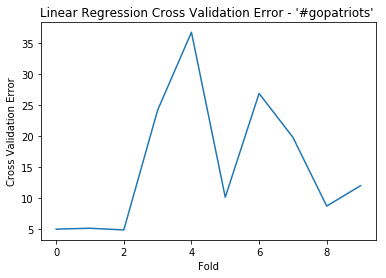

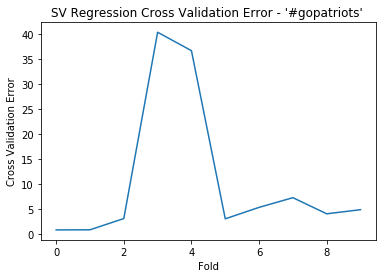

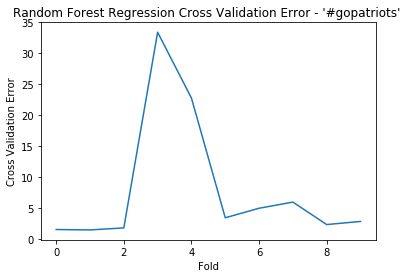

####################
Second time period 

Errors: 

('Linear Regression Model:  \r', [5674.361309142055, 2046.6779402531138, 1259.4022379842936, 583.9193863091132, 326.7438973055978, 713.8614225103956, 1909.2895133005804, 2350.190204884304, 1458.4666348924948, 2450.668073809211])
('SV Regression Model:  \r', [1458.5, 1062.5, 894.5, 770.5, 108.5, 2440.0, 2781.0, 662.0, 2063.0, 2364.0])
('Random Forest Regression Model:  \r', [534.25, 4.0, 120.14999999999998, 143.20000000000005, 363.70000000000005, 1767.9, 1904.2, 1963.8000000000002, 1621.7, 536.5])


Mean absolute error was : 

('Linear Regression Model:  \r', 1877.358062039116)
('SV Regression Model:  \r', 1460.45)
('Random Forest Regression Model:  \r', 895.9400000000002)


RMSE was : 

('Linear Regression Model:  \r', 43.32849018877898)
('SV Regression Model:  \r', 38.21583441454602)
('Random Forest Regression Model:  \r', 29.9322568477554)




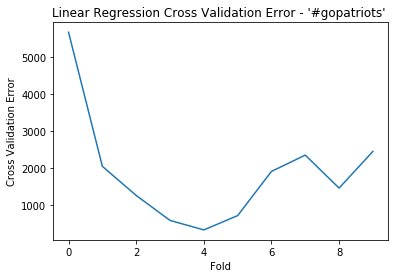

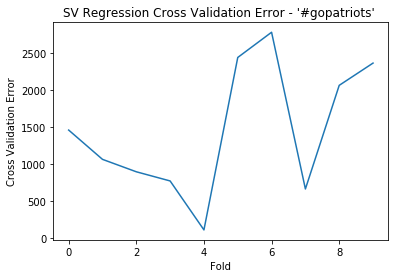

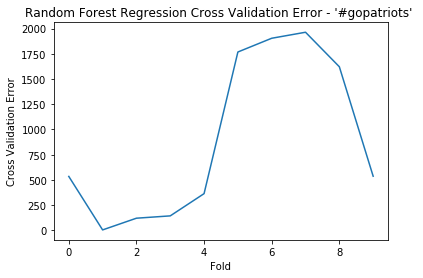

####################
Third time period 

Errors: 

('Linear Regression Model:  \r', [16.768148704791432, 4.711161380152947, 0.7169510402299749, 0.6928368728191191, 1.3807321981923957, 0.6455239676867093, 0.04776385179510561, 0.31567778400573726, 0.21634574831100198, 0.17479884075177762])
('SV Regression Model:  \r', [39.714796876509205, 4.230390022881353, 0.7472144776000944, 0.7250980913188602, 1.1386361117355346, 0.5862260363247499, 0.361845995246584, 0.345262469371097, 0.3529624952454067, 0.2811795378243065])
('Random Forest Regression Model:  \r', [21.346153846153847, 8.185287830600423, 0.6166127582669007, 0.5612138486890694, 0.9332270244635804, 0.5099998663499271, 0.4766258997103245, 0.2872402231999886, 0.44163682339809146, 0.30373169680525564])


Mean absolute error was : 

('Linear Regression Model:  \r', 2.56699403887362)
('SV Regression Model:  \r', 4.848361211405718)
('Random Forest Regression Model:  \r', 3.3661729817637416)


RMSE was : 

('Linear Regression Model:  \r', 1.6

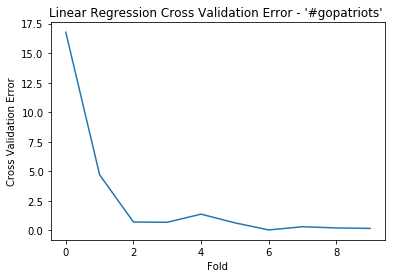

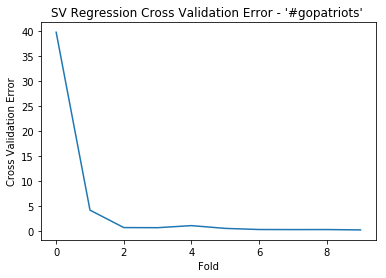

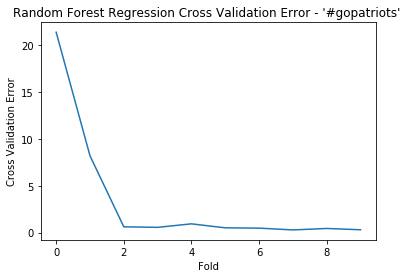

In [50]:
for (htag,lcount) in hashtags.items():
    
    print ("-"*40)
    print ("Extracting features from tweets:  \r")
    print( "#%s"%htag + ":\n")

    with open(join('tweet_data', 'tweets_#' + htag + '.txt'), 'r') as f:
        df = pd.DataFrame(index=range(lcount), columns=['dateTime', 'tweetCount', 'retweetCount', 'followerSum', 'maxFollowers', 'impressionCount',
            'favoriteCount', 'rankingScore', 'userID', 'numberLongTweets'])

        for i, line in tqdm(enumerate(f), total=lcount):
            tweet_data = json.loads(line)
            date = datetime.fromtimestamp(tweet_data['firstpost_date'])
            df.set_value(i, 'dateTime', date)
            df.set_value(i, 'tweetCount', 1)
            df.set_value(i, 'retweetCount', tweet_data['metrics']['citations']['total'])
            df.set_value(i, 'followerSum', tweet_data['author']['followers'])
            df.set_value(i, 'maxFollowers', tweet_data['author']['followers'])
            df.set_value(i, 'impressionCount', tweet_data.get('metrics').get('impressions'))
            df.set_value(i, 'favoriteCount', tweet_data.get('tweet').get('favorite_count'))
            df.set_value(i, 'rankingScore', tweet_data.get('metrics').get('ranking_score'))
            df.set_value(i, 'userID', tweet_data.get('tweet').get('user').get('id'))
            if (len(tweet_data.get('title')) > 100):
                df.set_value(i, 'longTweet', tweet_data.get('title'))


        date1 = datetime(2015,2,1,8,0,0)
        date2 = datetime(2015,2,1,20,0,0)
        
        error_lr, error_svr, error_rf = cross_validate(*df2array(df))
        print("#"*20)
        print("All time periods \n")
        print("Errors: \n")
        
        print ("Linear Regression Model:  \r", error_lr)
        print ("SV Regression Model:  \r", error_svr)
        print ("Random Forest Regression Model:  \r", error_rf)
        print("\n")
        print("Mean absolute error was : \n")
        
        print ("Linear Regression Model:  \r", np.mean(error_lr))
        print ("SV Regression Model:  \r", np.mean(error_svr))
        print ("Random Forest Regression Model:  \r", np.mean(error_rf))
        print("\n")
        print("RMSE was : \n")
        
        print ("Linear Regression Model:  \r", np.sqrt(np.mean(error_lr)))
        print ("SV Regression Model:  \r", np.sqrt(np.mean(error_svr)))
        print ("Random Forest Regression Model:  \r", np.sqrt(np.mean(error_rf)))
        print("\n")
        #plots:
        plt.figure()
        plt.plot(error_lr)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("Linear Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("lrError'#%s'"%htag, format='png')
        
        plt.figure()
        plt.plot(error_svr)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("SV Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("svrError'#%s'"%htag, format='png')
            
        plt.figure()
        plt.plot(error_rf)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("Random Forest Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("rfError'#%s'"%htag, format='png')

        # Data Frame for first Interval
        df1 = df[df.dateTime < date1]
        error_lr1, error_svr1, error_rf1 = cross_validate(*df2array(df1))
        print("#"*20)
        print("First time period \n")
        print("Errors: \n")
        
        print ("Linear Regression Model:  \r", error_lr1)
        print ("SV Regression Model:  \r", error_svr1)
        print ("Random Forest Regression Model:  \r", error_rf1)
        print("\n")
        print("Mean absolute error was : \n")
        
        print ("Linear Regression Model:  \r", np.mean(error_lr1))
        print ("SV Regression Model:  \r", np.mean(error_svr1))
        print ("Random Forest Regression Model:  \r", np.mean(error_rf1))
        print("\n")
        print("RMSE was : \n")
        
        print ("Linear Regression Model:  \r", np.sqrt(np.mean(error_lr1)))
        print ("SV Regression Model:  \r", np.sqrt(np.mean(error_svr1)))
        print ("Random Forest Regression Model:  \r", np.sqrt(np.mean(error_rf1)))
        print("\n")
        
        #plots:
        plt.figure()
        plt.plot(error_lr1)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("Linear Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("lr1Error'#%s'"%htag, format='png')
        
        plt.figure()
        plt.plot(error_svr1)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("SV Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("svr1Error'#%s'"%htag, format='png')
            
        plt.figure()
        plt.plot(error_rf1)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("Random Forest Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("rf1Error'#%s'"%htag, format='png')

        


        # Data Frame for second Interval
        df2 = df[(df.dateTime > date1) & (df.dateTime < date2)]
        error_lr2, error_svr2, error_rf2 = cross_validate(*df2array(df2))
        print("#"*20)
        print("Second time period \n")
        print("Errors: \n")
        
        print ("Linear Regression Model:  \r", error_lr2)
        print ("SV Regression Model:  \r", error_svr2)
        print ("Random Forest Regression Model:  \r", error_rf2)
        print("\n")
        print("Mean absolute error was : \n")
        
        print ("Linear Regression Model:  \r", np.mean(error_lr2))
        print ("SV Regression Model:  \r", np.mean(error_svr2))
        print ("Random Forest Regression Model:  \r", np.mean(error_rf2))
        print("\n")
        print("RMSE was : \n")
        
        print ("Linear Regression Model:  \r", np.sqrt(np.mean(error_lr2)))
        print ("SV Regression Model:  \r", np.sqrt(np.mean(error_svr2)))
        print ("Random Forest Regression Model:  \r", np.sqrt(np.mean(error_rf2)))
        print("\n")
        
        
        #plots:
        plt.figure()
        plt.plot(error_lr2)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("Linear Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("lr2Error'#%s'"%htag, format='png')
        
        plt.figure()
        plt.plot(error_svr2)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("SV Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("svr2Error'#%s'"%htag, format='png')
            
        plt.figure()
        plt.plot(error_rf2)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("Random Forest Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("rf2Error'#%s'"%htag, format='png')

        


        # Data Frame for third Interval
        df3 = df[df.dateTime > date2]
        error_lr3, error_svr3, error_rf3 = cross_validate(*df2array(df3))
        print("#"*20)
        print("Third time period \n")
        print("Errors: \n")
        
        print ("Linear Regression Model:  \r", error_lr3)
        print ("SV Regression Model:  \r", error_svr3)
        print ("Random Forest Regression Model:  \r", error_rf3)
        print("\n")
        print("Mean absolute error was : \n")
        
        print ("Linear Regression Model:  \r", np.mean(error_lr3))
        print ("SV Regression Model:  \r", np.mean(error_svr3))
        print ("Random Forest Regression Model:  \r", np.mean(error_rf3))
        print("\n")
        print("RMSE was : \n")
        
        print ("Linear Regression Model:  \r", np.sqrt(np.mean(error_lr3)))
        print ("SV Regression Model:  \r", np.sqrt(np.mean(error_svr3)))
        print ("Random Forest Regression Model:  \r", np.sqrt(np.mean(error_rf3)))
        print("\n")
        
        #plots:
        plt.figure()
        plt.plot(error_lr3)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("Linear Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("lr3Error'#%s'"%htag, format='png')
        
        plt.figure()
        plt.plot(error_svr3)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("SV Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("svr3Error'#%s'"%htag, format='png')
            
        plt.figure()
        plt.plot(error_rf3)
        plt.xlabel('Fold')
        plt.ylabel('Cross Validation Error', rotation=90)
        plt.title("Random Forest Regression Cross Validation Error - '#%s' " %htag)
        plt.show()
        if savePlots:
            plt.savefig("rf3Error'#%s'"%htag, format='png')

        


### Part 1.4: Question ii) Models for combined dataset for all hashtags

In [62]:
totalCount = 0
for (htag,lcount) in hashtags.items():
    print htag,"-", lcount
    totalCount += lcount
print "Total numberof of tweets = ", totalCount

superbowl - 1348767
nfl - 259024
sb49 - 826951
patriots - 489713
gohawks - 188136
gopatriots - 26232
Total numberof of tweets =  3138823


In [58]:

df = pd.DataFrame(index=range(totalCount), columns=['dateTime', 'tweetCount', 'retweetCount', 'followerSum', 'maxFollowers', 'impressionCount',
            'favoriteCount', 'rankingScore', 'userID', 'numberLongTweets'])

for (htag,lcount) in hashtags.items():
    with open(join('tweet_data', 'tweets_#' + htag + '.txt'), 'r') as f:

            for i, line in tqdm(enumerate(f), total=lcount):
                tweet_data = json.loads(line)
                date = datetime.fromtimestamp(tweet_data['firstpost_date'])
                df.set_value(i, 'dateTime', date)
                df.set_value(i, 'tweetCount', 1)
                df.set_value(i, 'retweetCount', tweet_data['metrics']['citations']['total'])
                df.set_value(i, 'followerSum', tweet_data['author']['followers'])
                df.set_value(i, 'maxFollowers', tweet_data['author']['followers'])
                df.set_value(i, 'impressionCount', tweet_data.get('metrics').get('impressions'))
                df.set_value(i, 'favoriteCount', tweet_data.get('tweet').get('favorite_count'))
                df.set_value(i, 'rankingScore', tweet_data.get('metrics').get('ranking_score'))
                df.set_value(i, 'userID', tweet_data.get('tweet').get('user').get('id'))
                if (len(tweet_data.get('title')) > 100):
                    df.set_value(i, 'longTweet', tweet_data.get('title'))


            date1 = datetime(2015,2,1,8,0,0)
            date2 = datetime(2015,2,1,20,0,0)
        

100%|██████████| 26232/26232 [00:06<00:00, 4116.67it/s]


In [66]:
print"Combined dataset for all hastags has a shape of ", df.shape

Combined dataset for all hastags has a shape of  (3138823, 11)


Results for combined dataset 

####################
All time periods 

Errors: 

Linear Regression Model:   [506.98019221233324, 508.26341882072813, 499.7962159830816, 2749.0700754043296, 453.62344970250365, 342.84348068711023, 395.763965661603, 7848.608065306483, 29642.93445250847, 2615.7242878695924]
SV Regression Model:   [97.1849673046519, 97.77647364615046, 99.80938444255882, 850.9685714285716, 81.90724637681159, 129.82173913043474, 124.34782608695652, 5567.245652173912, 12209.084057971015, 290.0289855072463]
Random Forest Regression Model:   [147.31733567332046, 146.59820318064638, 141.56466813700345, 958.8059019157763, 44.62473177653082, 59.240465531085455, 70.5743780365515, 4205.355048042546, 11741.898481268347, 181.91507050953987]


Mean absolute error was : 
Linear Regression Model:   4556.360760415623
1954.8174904068314l:  
1769.789428407135ression Model:  


RMSE was : 

('Linear Regression Model:  \r', 67.50082044253702)
('SV Regression Model:  \r', 44.21331802078228)
('Ra

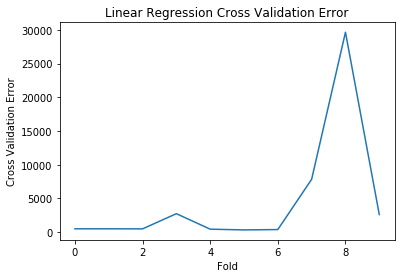

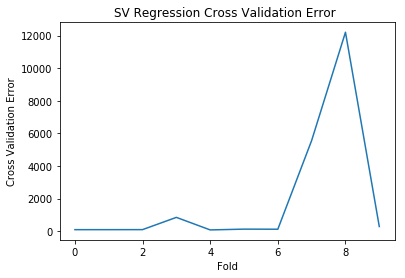

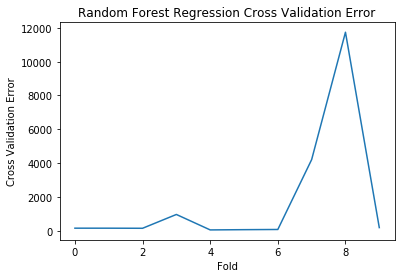

####################
First time period 

Errors: 

('Linear Regression Model:  \r', [128.9708340733818, 130.8684927750351, 121.3890971947603, 696.1191937319485, 826.1813435209261, 361.13845455921586, 384.2579692131549, 576.4178022562282, 231.83879106001189, 204.7165971599388])
('SV Regression Model:  \r', [28.32580645580111, 28.202133107580075, 33.581196624979995, 808.9293633680709, 321.81057484011995, 69.3648496096317, 150.24013097174148, 186.62700734075028, 88.69803093565713, 65.21691101053781])
('Random Forest Regression Model:  \r', [7.024422567802498, 6.8805391506246165, 5.314980527426528, 653.1399747094821, 210.66612185575056, 87.98234970669888, 68.27108013752714, 62.024293432113964, 38.39204656682751, 66.4793005966007])


Mean absolute error was : 

('Linear Regression Model:  \r', 366.18985755446016)
('SV Regression Model:  \r', 178.09960042648703)
('Random Forest Regression Model:  \r', 120.61751092508545)


RMSE was : 

('Linear Regression Model:  \r', 19.13608783305669)
('SV

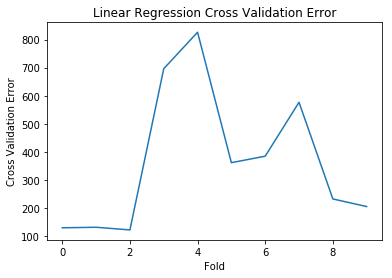

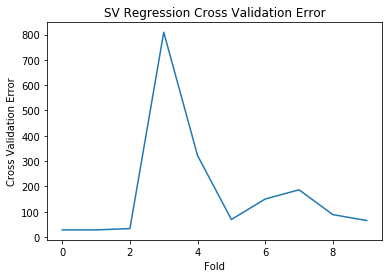

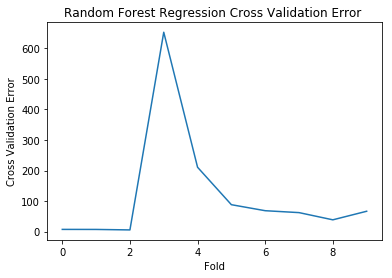

####################
Second time period 

Errors: 

('Linear Regression Model:  \r', [23118.48168921445, 8976.251760696876, 4376.865141732735, 13153.111840385012, 3912.7129137746524, 20432.831895142328, 23272.051103335805, 74345.11155651882, 147656.52112441882, 49222.75799763203])
('SV Regression Model:  \r', [80324.0, 34429.5, 11147.0, 26955.5, 28836.5, 38102.5, 93533.5, 217453.5, 169589.5, 147447.5])
('Random Forest Regression Model:  \r', [51617.7, 20931.4, 11976.099999999999, 2941.699999999997, 14068.400000000001, 42079.3, 92190.6, 142192.3, 1140.2000000000116, 11347.0])


Mean absolute error was : 

('Linear Regression Model:  \r', 36846.66970228516)
('SV Regression Model:  \r', 84781.9)
('Random Forest Regression Model:  \r', 39048.47)


RMSE was : 

('Linear Regression Model:  \r', 191.95486371093898)
('SV Regression Model:  \r', 291.1733160851111)
('Random Forest Regression Model:  \r', 197.60685716846973)




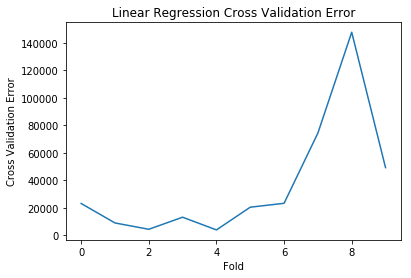

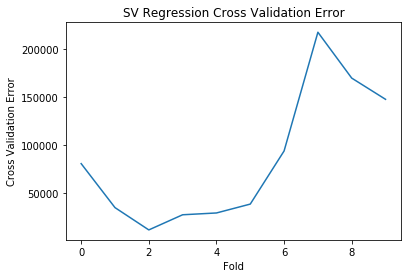

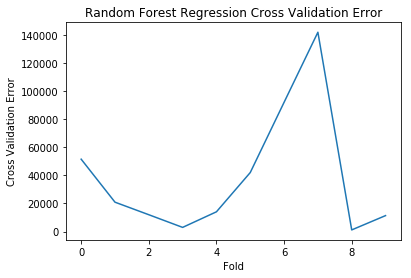

####################
Third time period 

Errors: 

('Linear Regression Model:  \r', [3510.8715468660125, 1202.7201735709318, 595.651191524483, 422.6858739922023, 217.00940844324683, 243.16572763065957, 179.98953792414517, 276.71405580460714, 216.707360183796, 78.6979538747489])
('SV Regression Model:  \r', [4376.5, 3349.1428571428573, 1072.2857142857142, 256.92857142857144, 266.8153846153846, 318.84615384615387, 198.6153846153846, 365.53846153846155, 180.23076923076923, 587.0])
('Random Forest Regression Model:  \r', [1288.1341625041625, 663.0729545874293, 539.120241187384, 213.41165767585102, 193.2085958156353, 68.69406106746827, 76.92191388503025, 117.95083167448911, 88.01418778964025, 241.52057189187624])


Mean absolute error was : 

('Linear Regression Model:  \r', 694.4212829814834)
('SV Regression Model:  \r', 1097.19032967033)
('Random Forest Regression Model:  \r', 349.0049178078967)


RMSE was : 

('Linear Regression Model:  \r', 26.351874373210787)
('SV Regression Model:  \r

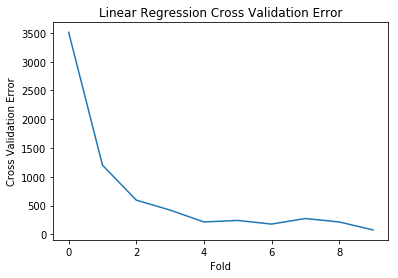

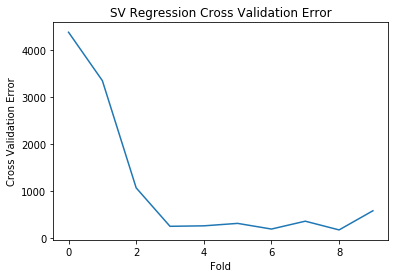

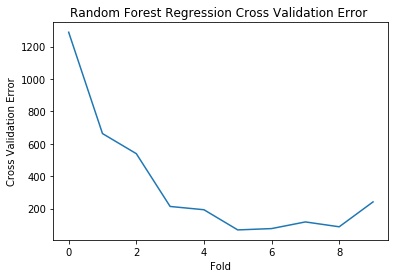

In [68]:
print "Results for combined dataset \n"
error_lr, error_svr, error_rf = cross_validate(*df2array(df))
print"#"*20
print"All time periods \n"
print"Errors: \n"

print "Linear Regression Model:  ", error_lr
print "SV Regression Model:  ", error_svr
print "Random Forest Regression Model:  ", error_rf
print "\n"
print"Mean absolute error was : "

print "Linear Regression Model:  ", np.mean(error_lr)
print "SV Regression Model:  \r", np.mean(error_svr)
print "Random Forest Regression Model:  \r", np.mean(error_rf)
print("\n")
print("RMSE was : \n")

print ("Linear Regression Model:  \r", np.sqrt(np.mean(error_lr)))
print ("SV Regression Model:  \r", np.sqrt(np.mean(error_svr)))
print ("Random Forest Regression Model:  \r", np.sqrt(np.mean(error_rf)))
print("\n")
#plots:
plt.figure()
plt.plot(error_lr)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("Linear Regression Cross Validation Error")
plt.show()
if savePlots:
    plt.savefig("lrError_combined", format='png')

plt.figure()
plt.plot(error_svr)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("SV Regression Cross Validation Error ")
plt.show()
if savePlots:
    plt.savefig("svrError_combined", format='png')

plt.figure()
plt.plot(error_rf)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("Random Forest Regression Cross Validation Error")
plt.show()
if savePlots:
    plt.savefig("rfError_combined", format='png')

# Data Frame for first Interval
df1 = df[df.dateTime < date1]
error_lr1, error_svr1, error_rf1 = cross_validate(*df2array(df1))
print("#"*20)
print("First time period \n")
print("Errors: \n")

print ("Linear Regression Model:  \r", error_lr1)
print ("SV Regression Model:  \r", error_svr1)
print ("Random Forest Regression Model:  \r", error_rf1)
print("\n")
print("Mean absolute error was : \n")

print ("Linear Regression Model:  \r", np.mean(error_lr1))
print ("SV Regression Model:  \r", np.mean(error_svr1))
print ("Random Forest Regression Model:  \r", np.mean(error_rf1))
print("\n")
print("RMSE was : \n")

print ("Linear Regression Model:  \r", np.sqrt(np.mean(error_lr1)))
print ("SV Regression Model:  \r", np.sqrt(np.mean(error_svr1)))
print ("Random Forest Regression Model:  \r", np.sqrt(np.mean(error_rf1)))
print("\n")

#plots:
plt.figure()
plt.plot(error_lr1)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("Linear Regression Cross Validation Error")
plt.show()
if savePlots:
    plt.savefig("lr1Error_combined", format='png')

plt.figure()
plt.plot(error_svr1)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("SV Regression Cross Validation Error")
plt.show()
if savePlots:
    plt.savefig("svr1Error_combined", format='png')

plt.figure()
plt.plot(error_rf1)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("Random Forest Regression Cross Validation Error ")
plt.show()
if savePlots:
    plt.savefig("rf1Error_combined", format='png')




# Data Frame for second Interval
df2 = df[(df.dateTime > date1) & (df.dateTime < date2)]
error_lr2, error_svr2, error_rf2 = cross_validate(*df2array(df2))
print("#"*20)
print("Second time period \n")
print("Errors: \n")

print ("Linear Regression Model:  \r", error_lr2)
print ("SV Regression Model:  \r", error_svr2)
print ("Random Forest Regression Model:  \r", error_rf2)
print("\n")
print("Mean absolute error was : \n")

print ("Linear Regression Model:  \r", np.mean(error_lr2))
print ("SV Regression Model:  \r", np.mean(error_svr2))
print ("Random Forest Regression Model:  \r", np.mean(error_rf2))
print("\n")
print("RMSE was : \n")

print ("Linear Regression Model:  \r", np.sqrt(np.mean(error_lr2)))
print ("SV Regression Model:  \r", np.sqrt(np.mean(error_svr2)))
print ("Random Forest Regression Model:  \r", np.sqrt(np.mean(error_rf2)))
print("\n")


#plots:
plt.figure()
plt.plot(error_lr2)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("Linear Regression Cross Validation Error")
plt.show()
if savePlots:
    plt.savefig("lr2Error_combined", format='png')

plt.figure()
plt.plot(error_svr2)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("SV Regression Cross Validation Error")
plt.show()
if savePlots:
    plt.savefig("svr2Error_combined", format='png')

plt.figure()
plt.plot(error_rf2)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("Random Forest Regression Cross Validation Error")
plt.show()
if savePlots:
    plt.savefig("rf2Error_combined", format='png')




# Data Frame for third Interval
df3 = df[df.dateTime > date2]
error_lr3, error_svr3, error_rf3 = cross_validate(*df2array(df3))
print("#"*20)
print("Third time period \n")
print("Errors: \n")

print ("Linear Regression Model:  \r", error_lr3)
print ("SV Regression Model:  \r", error_svr3)
print ("Random Forest Regression Model:  \r", error_rf3)
print("\n")
print("Mean absolute error was : \n")

print ("Linear Regression Model:  \r", np.mean(error_lr3))
print ("SV Regression Model:  \r", np.mean(error_svr3))
print ("Random Forest Regression Model:  \r", np.mean(error_rf3))
print("\n")
print("RMSE was : \n")

print ("Linear Regression Model:  \r", np.sqrt(np.mean(error_lr3)))
print ("SV Regression Model:  \r", np.sqrt(np.mean(error_svr3)))
print ("Random Forest Regression Model:  \r", np.sqrt(np.mean(error_rf3)))
print("\n")

#plots:
plt.figure()
plt.plot(error_lr3)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("Linear Regression Cross Validation Error")
plt.show()
if savePlots:
    plt.savefig("lr3Error_combined", format='png')

plt.figure()
plt.plot(error_svr3)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("SV Regression Cross Validation Error")
plt.show()
if savePlots:
    plt.savefig("svr3Error_combined", format='png')

plt.figure()
plt.plot(error_rf3)
plt.xlabel('Fold')
plt.ylabel('Cross Validation Error', rotation=90)
plt.title("Random Forest Regression Cross Validation Error ")
plt.show()
if savePlots:
    plt.savefig("rf3Error_combined", format='png')


